In [1]:
########
# Student ID: 10724837
# In this notebook, I carry out some basic observation of the data, as well as the EDA. I then save the final file as a .csv 
# before moving over to R to develop the regression models.
########

In [2]:
# import packages we will be using
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# load the data and observe basic info
diabetes = pd.read_csv("PimaDiabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       750 non-null    int64  
 1   Glucose           750 non-null    int64  
 2   BloodPressure     750 non-null    int64  
 3   SkinThickness     750 non-null    int64  
 4   Insulin           750 non-null    int64  
 5   BMI               750 non-null    float64
 6   DiabetesPedigree  750 non-null    float64
 7   Age               750 non-null    int64  
 8   Outcome           750 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.9 KB


In [4]:
# check for null values
diabetes.isna().sum(axis = 0)

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

In [5]:
# there are no null values!

In [6]:
# calculate some key summary statistics, mainly interested in the min and max values
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# there are no negative min values, a good sign
# there are some very large max values, such as 846 in the Insulin columns
# we will deal with such outliers later

In [8]:
# check the number of zero values in each column
diabetes.isin([0]).sum(axis = 0)

Pregnancies         109
Glucose               5
BloodPressure        35
SkinThickness       221
Insulin             362
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome             490
dtype: int64

In [9]:
# there are lots of zeroes in columns where it doesn't make sense
# for example, you definitely cannot have a SkinThickness or BMI of 0
# the columns which have zeroes when they should not are: Glucose, BloodPressure, SkinThickness, Insulin and BMI
# this is a problem with the data and we need to look at how these 0s are distributed

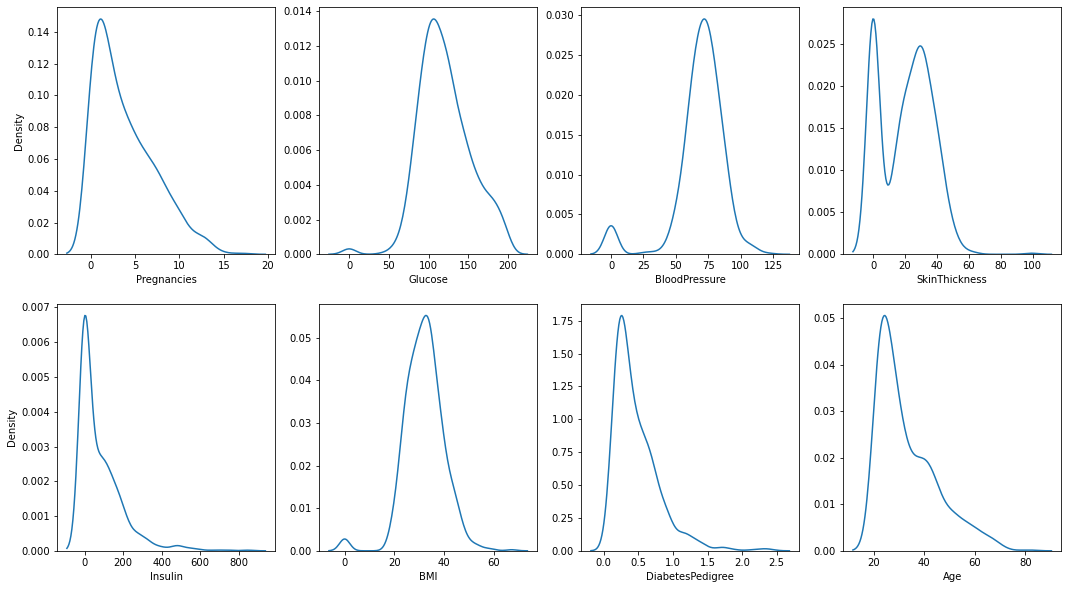

In [10]:
# plot the distributions of each column
plt.figure(figsize = (18,10),facecolor=(1, 1, 1))

plt.subplot(2,4,1)
sns.kdeplot(data = diabetes['Pregnancies'])

plt.subplot(2,4,2)
sns.kdeplot(data = diabetes['Glucose'])
plt.ylabel("")

plt.subplot(2,4,3)
sns.kdeplot(data = diabetes['BloodPressure'])
plt.ylabel("")

plt.subplot(2,4,4)
sns.kdeplot(data = diabetes['SkinThickness'])
plt.ylabel("")

plt.subplot(2,4,5)
sns.kdeplot(data = diabetes['Insulin'])

plt.subplot(2,4,6)
sns.kdeplot(data = diabetes['BMI'])
plt.ylabel("")

plt.subplot(2,4,7)
sns.kdeplot(data = diabetes['DiabetesPedigree'])
plt.ylabel("")

plt.subplot(2,4,8)
sns.kdeplot(data = diabetes['Age'])
plt.ylabel("")

plt.savefig(fname = "diabetesfig1")

In [11]:
# ignoring the zero values, these columns resemble normal distributions
# use mean value imputation to replace all zero values
# apply the mean value imputations
meanImputationColumns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in meanImputationColumns:
    mean = diabetes[diabetes[column] != 0][column].mean()
    diabetes[column] = diabetes[column].replace(0, mean)

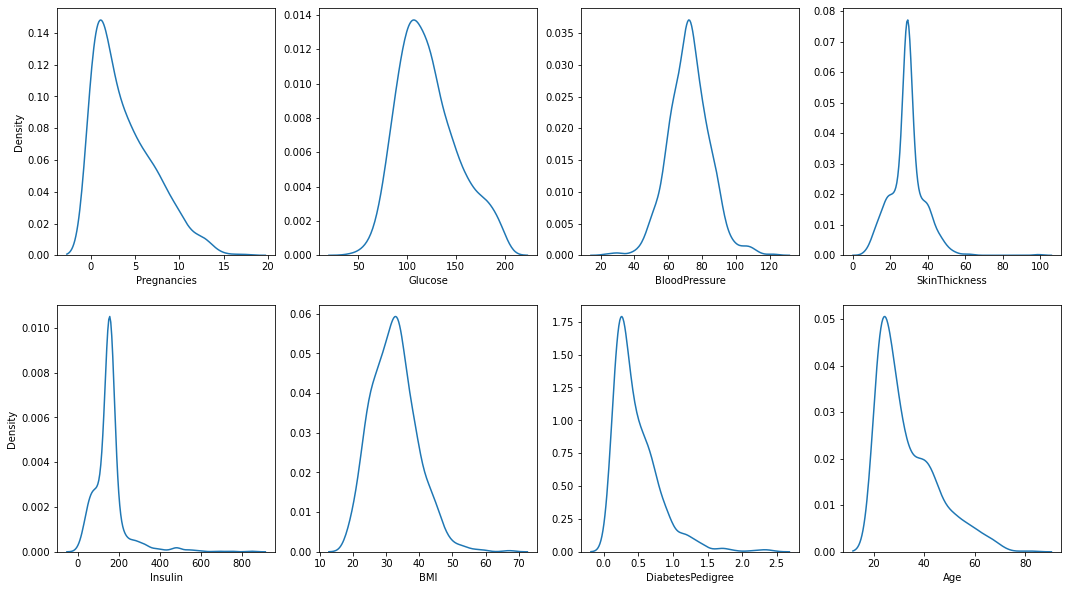

In [12]:
# observe the distributions now that we have imputed zero values
plt.figure(figsize = (18,10),facecolor=(1, 1, 1))

plt.subplot(2,4,1)
sns.kdeplot(data = diabetes['Pregnancies'])

plt.subplot(2,4,2)
sns.kdeplot(data = diabetes['Glucose'])
plt.ylabel("")

plt.subplot(2,4,3)
sns.kdeplot(data = diabetes['BloodPressure'])
plt.ylabel("")

plt.subplot(2,4,4)
sns.kdeplot(data = diabetes['SkinThickness'])
plt.ylabel("")

plt.subplot(2,4,5)
sns.kdeplot(data = diabetes['Insulin'])

plt.subplot(2,4,6)
sns.kdeplot(data = diabetes['BMI'])
plt.ylabel("")

plt.subplot(2,4,7)
sns.kdeplot(data = diabetes['DiabetesPedigree'])
plt.ylabel("")

plt.subplot(2,4,8)
sns.kdeplot(data = diabetes['Age'])
plt.ylabel("")

plt.savefig(fname = "diabetesfig2")

In [13]:
# some of the distributions are right-skewed, particularly Pregnancies, DiabetesPedigree and Age
# to fix this, we can use either log or square root transformations
# since Pregnancies has zero values, log transform will not work
# as for DiabetesPedigree and Age, we can try both log and square root transforms and see which fixes skewness more effectively

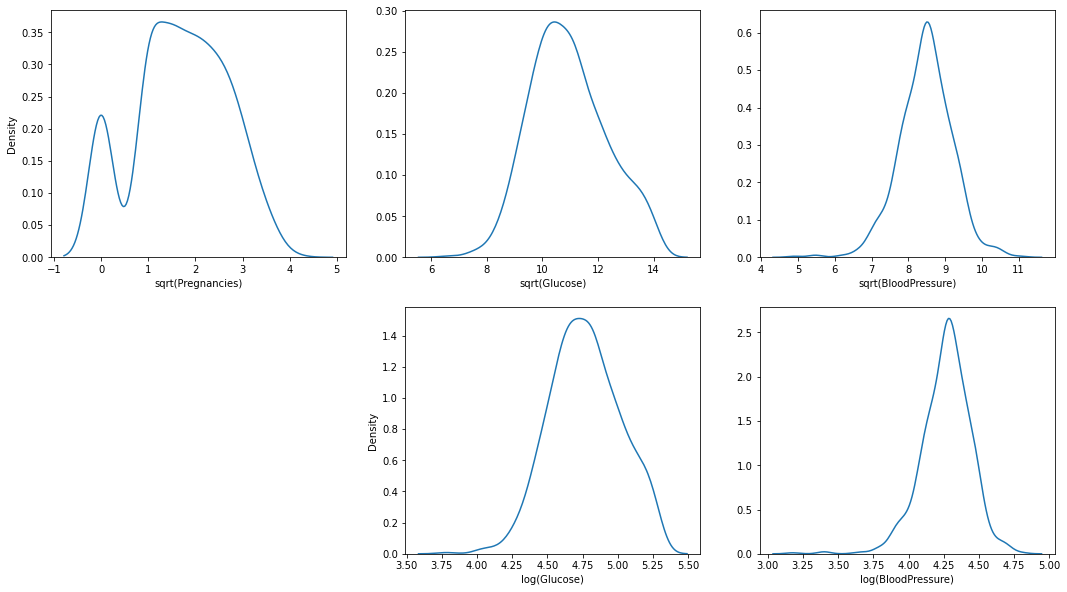

In [14]:
# plot the square root transforms of all three columns
plt.figure(figsize = (18,10),facecolor=(1, 1, 1))

plt.subplot(2,3,1)
sns.kdeplot(data = np.sqrt(diabetes['Pregnancies']))
plt.xlabel("sqrt(Pregnancies)")

plt.subplot(2,3,2)
sns.kdeplot(data = np.sqrt(diabetes['Glucose']))
plt.xlabel("sqrt(Glucose)")
plt.ylabel("")

plt.subplot(2,3,3)
sns.kdeplot(data = np.sqrt(diabetes['BloodPressure']))
plt.xlabel("sqrt(BloodPressure)")
plt.ylabel("")


# plot the log transforms of Glucose and BloodPressure
plt.subplot(2,3,5)
sns.kdeplot(data = np.log(diabetes['Glucose']))
plt.xlabel("log(Glucose)")

plt.subplot(2,3,6)
sns.kdeplot(data = np.log(diabetes['BloodPressure']))
plt.xlabel("log(BloodPressure)")
plt.ylabel("")


plt.savefig(fname = "diabetesfig3")

In [15]:
# the square root transform made Pregnancies bimodal, so leave Pregnancies without a transform
# both sqrt and log transforms worked well on Glucose and BloodPressure
# so consider using log(Glucose) and log(BloodPressure) in our later models

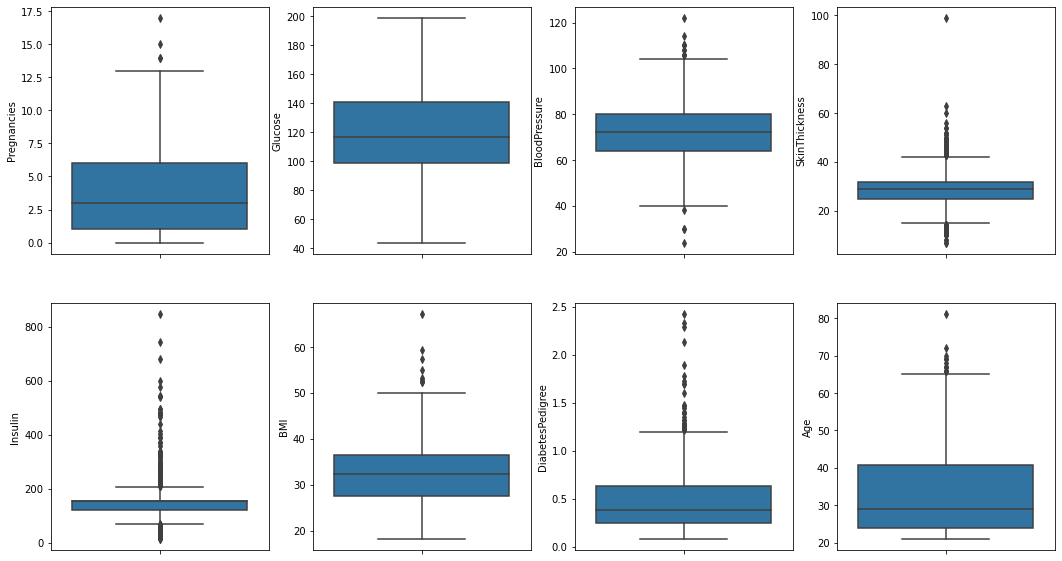

In [16]:
# we move onto dealing with outliers
# plot boxplots to see how outliers are distributed visually
plt.figure(figsize = (18,10),facecolor=(1, 1, 1))

plt.subplot(2,4,1)
sns.boxplot(y = diabetes['Pregnancies'])

plt.subplot(2,4,2)
sns.boxplot(y = diabetes['Glucose'])

plt.subplot(2,4,3)
sns.boxplot(y = diabetes['BloodPressure'])

plt.subplot(2,4,4)
sns.boxplot(y = diabetes['SkinThickness'])

plt.subplot(2,4,5)
sns.boxplot(y = diabetes['Insulin'])

plt.subplot(2,4,6)
sns.boxplot(y = diabetes['BMI'])

plt.subplot(2,4,7)
sns.boxplot(y = diabetes['DiabetesPedigree'])

plt.subplot(2,4,8)
sns.boxplot(y = diabetes['Age'])

# save the figure
plt.savefig(fname = "diabetesfig4")

In [17]:
# z-score or IQR methods would be more methodical to remove outliers, but some columns have lots of outliers,
# and some have barely any
# we do not want to remove too much data, so remove outliers by observation of the boxplots and by using common sense

# remove Pregnancies above 13
# define the condition for removal
condition = diabetes['Pregnancies'] > 13
# remove the entries where this is true
diabetes = diabetes[~condition]

# remove the obvious outlier for SkinThickness
condition = diabetes['SkinThickness'] > 80
diabetes = diabetes[~condition]

# remove Insulin above 620
condition = diabetes['Insulin'] > 620
diabetes = diabetes[~condition]

# remove the top outlier for BMI
condition = diabetes['BMI'] > 65
diabetes = diabetes[~condition]

# remove the top outlier for Age
condition = diabetes['Age'] > 80
diabetes = diabetes[~condition]

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       740 non-null    int64  
 1   Glucose           740 non-null    float64
 2   BloodPressure     740 non-null    float64
 3   SkinThickness     740 non-null    float64
 4   Insulin           740 non-null    float64
 5   BMI               740 non-null    float64
 6   DiabetesPedigree  740 non-null    float64
 7   Age               740 non-null    int64  
 8   Outcome           740 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 57.8 KB


In [18]:
# we have removed only 10 entries in total, a small amount, but it will improve our model slightly!

In [19]:
# calculate the covariance matrix
diabetes.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,10.735272,12.504876,9.082032,2.447829,24.190580,0.645843,-0.033573,20.983482,0.341420
Glucose,12.504876,908.084944,79.560776,43.060065,945.514805,45.115947,1.250934,88.719892,7.006599
BloodPressure,9.082032,79.560776,146.576174,19.311283,70.400334,21.199835,0.000034,47.644872,0.945726
SkinThickness,2.447829,43.060065,19.311283,71.356030,112.342561,32.261255,0.278894,9.960717,0.847734
Insulin,24.190580,945.514805,70.400334,112.342561,5779.974721,81.160529,1.690199,132.732698,8.566895
BMI,0.645843,45.115947,21.199835,32.261255,81.160529,45.846816,0.360071,2.514162,0.990293
DiabetesPedigree,-0.033573,1.250934,0.000034,0.278894,1.690199,0.360071,0.106680,0.167940,0.028575
Age,20.983482,88.719892,47.644872,9.960717,132.732698,2.514162,0.167940,132.940458,1.253507
Outcome,0.341420,7.006599,0.945726,0.847734,8.566895,0.990293,0.028575,1.253507,0.225306


In [20]:
# calculate the correlation matrix
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.126651,0.228952,0.088442,0.097113,0.029112,-0.031372,0.555447,0.219531
Glucose,0.126651,1.000000,0.218074,0.169159,0.412707,0.221112,0.127095,0.255346,0.489844
BloodPressure,0.228952,0.218074,1.000000,0.188827,0.076486,0.258611,0.000009,0.341315,0.164569
SkinThickness,0.088442,0.169159,0.188827,1.000000,0.174931,0.564042,0.101084,0.102270,0.211426
Insulin,0.097113,0.412707,0.076486,0.174931,1.000000,0.157662,0.068066,0.151421,0.237396
BMI,0.029112,0.221112,0.258611,0.564042,0.157662,1.000000,0.162814,0.032204,0.308122
DiabetesPedigree,-0.031372,0.127095,0.000009,0.101084,0.068066,0.162814,1.000000,0.044595,0.184311
Age,0.555447,0.255346,0.341315,0.102270,0.151421,0.032204,0.044595,1.000000,0.229040
Outcome,0.219531,0.489844,0.164569,0.211426,0.237396,0.308122,0.184311,0.229040,1.000000


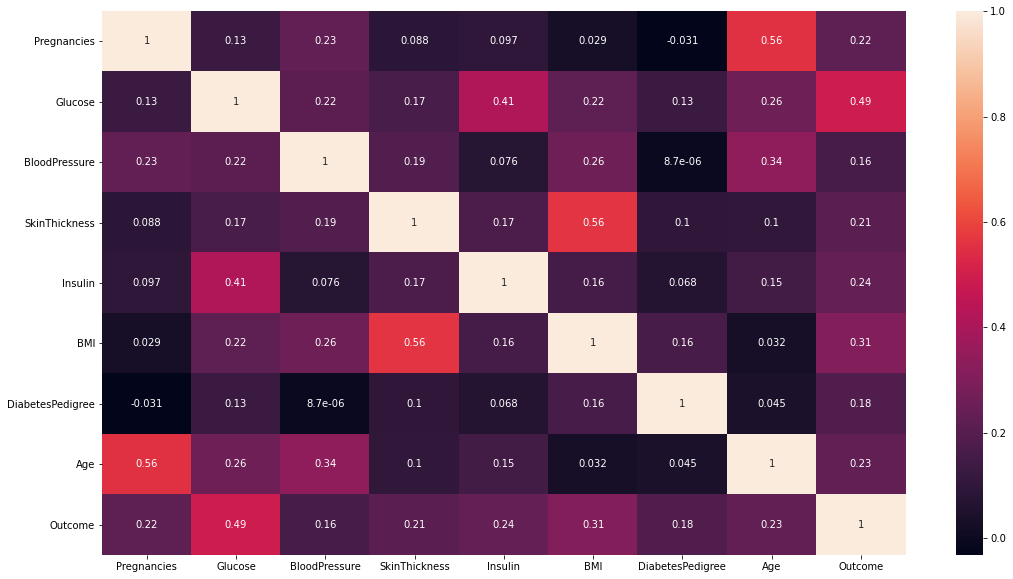

In [21]:
# alternatively, show as a heatmap
plt.figure(figsize = (18,10),facecolor=(1, 1, 1))
sns.heatmap(data = diabetes.corr(), annot = True)

plt.savefig(fname = "diabetesfig5")

In [22]:
# the strongest correlations are between BMI and SkinThickness and Age and Pregnancies
# none of these correlations are strong enough to instantly remove anything, but when designing our regression model later, we
# are less likely to keep these pairs in the model together
# Glucose has a higher correlation with Outcome than the other predictors, so we are likely to keep this
# BloodPressure has the lowest, so we are less likely to keep this

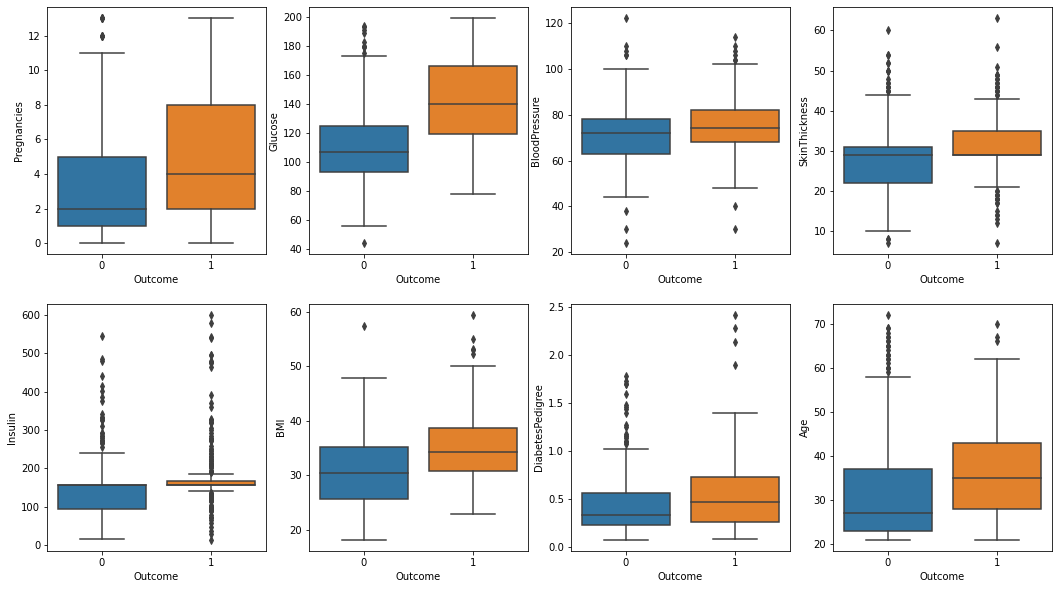

In [23]:
# boxplots for the sake of seeing how each predictor impacts the Outcome
plt.figure(figsize = (18,10), facecolor=(1, 1, 1))

plt.subplot(2,4,1)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['Pregnancies'])

plt.subplot(2,4,2)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['Glucose'])

plt.subplot(2,4,3)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['BloodPressure'])

plt.subplot(2,4,4)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['SkinThickness'])

plt.subplot(2,4,5)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['Insulin'])

plt.subplot(2,4,6)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['BMI'])

plt.subplot(2,4,7)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['DiabetesPedigree'])

plt.subplot(2,4,8)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['Age'])

# save the figure
plt.savefig(fname = "diabetesfig6")

In [24]:
# due to the high number of imputations carried out on Insulin and SkinThickness, their boxplots are much less informative
# BloodPressure does not change very much between the two, which was also reflected in their lower correlation
# again, it is likely a candidate for removal

<Figure size 1296x720 with 0 Axes>

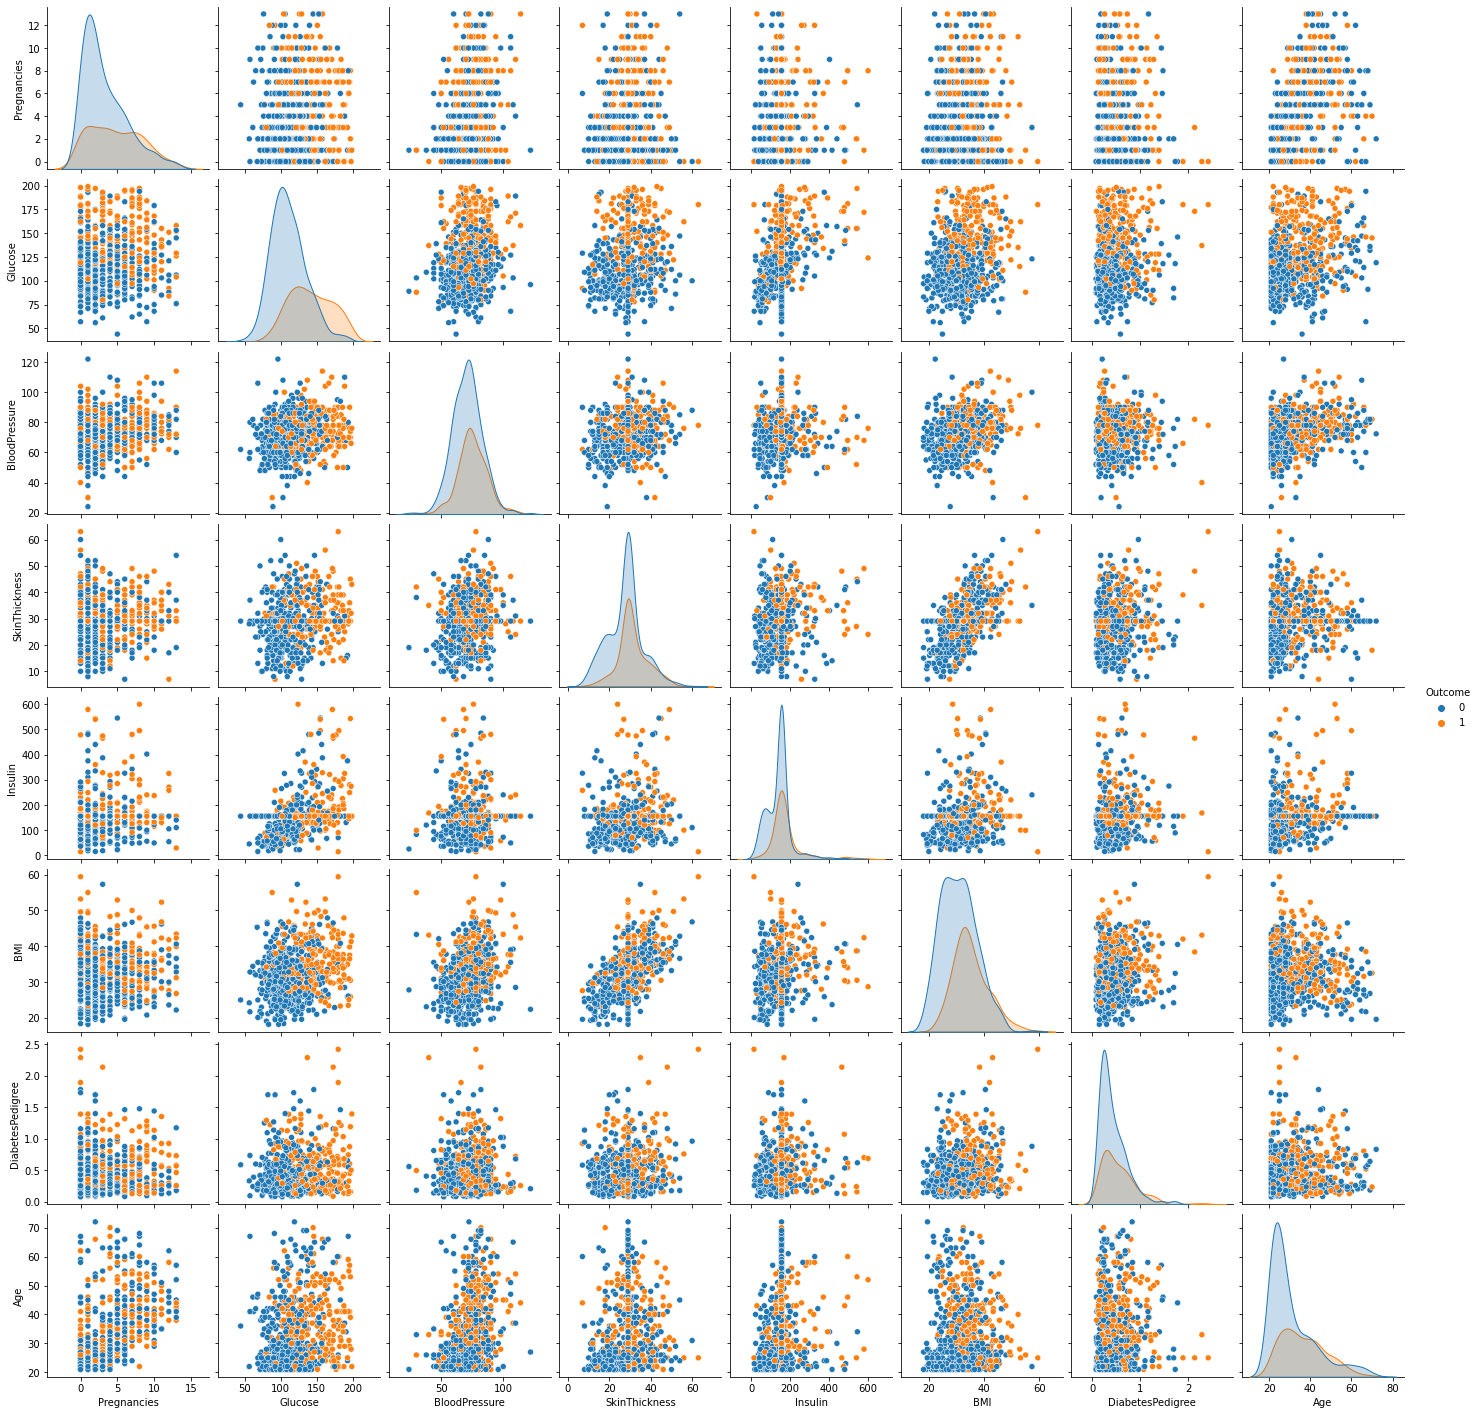

In [25]:
# pairplots for all predictors
plt.figure(figsize = (18,10),facecolor=(1, 1, 1))

sns.pairplot(data = diabetes, hue = "Outcome")

plt.savefig(fname = "diabetesfig7.jpg")

In [26]:
# these pairplots do not show any major patterns, it is not very informative

In [27]:
# add the column 7 or more pregnancies
diabetes['SevenOrMorePregnancies'] = np.where(diabetes['Pregnancies'] >= 7, True, False)

In [28]:
# save the diabetes dataset as a .csv and move over to R to carry on analysis
diabetes.to_csv("PimaDiabetes2.csv", index = False)